In [ ]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import time, pickle, os
import gymnasium as gym

In [ ]:
def test_policy(env: gym.Env, policy: np.ndarray) -> None:
    """Tests a tabular policy on a given toy text environment.

    Args:
        env (gym.Env): the Gymnasium environment
        policy (np.ndarray): the tabular policy as a numPy array.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    stochastic_policy = policy.shape == (num_states, num_actions)

    steps = 0
    done = False
    state, _ = env.reset()
    total_reward = 0

    while not done:
        #env.render()
        if stochastic_policy:
            action = np.random.choice(int(num_actions), p=policy[state])
            print(f"Selecting action: {action} with probability: {policy[state][action]}")
        else:
            action = policy[state]

        next_state, reward, done, truncated, _ = env.step(int(action))
        state = next_state
        steps += 1
        total_reward += reward
        if done or truncated:
          break

    #print(f"{'Success' if reward == 20 else 'Failed'} in {steps} steps")
    return total_reward

## GridSearchCV:

```python
from sklearn.model_selection import ParameterGrid

def grid_search(env, param_grid, episodes=3000, n_runs=2000):
    best_reward = float("-inf")
    best_params = {}

    for params in ParameterGrid(param_grid):
        step_size = params['step_size']
        gamma = params['gamma']
        decay_rate = params['decay_rate']
        Q = Q_learning(env, step_size, episodes, gamma, decay_rate)
        opt_p = determine_policy_from_Q(Q)

        total_runs_reward = 0
        for _ in range(n_runs):
          total_runs_reward += test_policy(env, opt_p)

        avg_reward = total_runs_reward / n_runs
        print("Average reward:",avg_reward)
        print("Parameters:",params)
        if avg_reward > best_reward:
            best_reward = avg_reward
            best_params = params

    return best_params, best_reward

# Define the parameter grid
param_grid = {
    'step_size': [0.1, 0.5, 0.9],
    'gamma': [0.9, 0.95, 0.99],
    'decay_rate': [0.001, 0.01, 0.1]
}

# Select environment
env = gym.make("CliffWalking-v0")

# Perform grid search
best_params, best_reward = grid_search(env, param_grid)

print("Best parameters:", best_params)
print("Best average reward:", best_reward)
```

```
Out[]:
Cliff falls per episode: 14.073
Average reward: -13.0
Parameters: {'decay_rate': 0.001, 'gamma': 0.9, 'step_size': 0.1}
Cliff falls per episode: 13.744666666666667
Average reward: -13.0
Parameters: {'decay_rate': 0.001, 'gamma': 0.9, 'step_size': 0.5}
Cliff falls per episode: 9.926333333333334
Average reward: -13.0
Parameters: {'decay_rate': 0.001, 'gamma': 0.9, 'step_size': 0.9}
Cliff falls per episode: 16.065333333333335
Average reward: -13.0
Parameters: {'decay_rate': 0.001, 'gamma': 0.95, 'step_size': 0.1}
Cliff falls per episode: 10.494333333333334
Average reward: -13.0
Parameters: {'decay_rate': 0.001, 'gamma': 0.95, 'step_size': 0.5}
Cliff falls per episode: 10.810666666666666
Average reward: -13.0
Parameters: {'decay_rate': 0.001, 'gamma': 0.95, 'step_size': 0.9}
Cliff falls per episode: 13.818333333333333
Average reward: -13.0
Parameters: {'decay_rate': 0.001, 'gamma': 0.99, 'step_size': 0.1}
Cliff falls per episode: 10.980333333333334
Average reward: -13.0
Parameters: {'decay_rate': 0.001, 'gamma': 0.99, 'step_size': 0.5}
Cliff falls per episode: 12.309333333333333
Average reward: -13.0
Parameters: {'decay_rate': 0.001, 'gamma': 0.99, 'step_size': 0.9}
Cliff falls per episode: 12.666
Average reward: -13.0
Parameters: {'decay_rate': 0.01, 'gamma': 0.9, 'step_size': 0.1}
Cliff falls per episode: 11.02
Average reward: -13.0
Parameters: {'decay_rate': 0.01, 'gamma': 0.9, 'step_size': 0.5}
Cliff falls per episode: 12.512333333333334
Average reward: -13.0
Parameters: {'decay_rate': 0.01, 'gamma': 0.9, 'step_size': 0.9}
Cliff falls per episode: 12.646333333333333
Average reward: -13.0
Parameters: {'decay_rate': 0.01, 'gamma': 0.95, 'step_size': 0.1}
Cliff falls per episode: 11.769666666666666
Average reward: -13.0
Parameters: {'decay_rate': 0.01, 'gamma': 0.95, 'step_size': 0.5}
Cliff falls per episode: 10.941
Average reward: -13.0
Parameters: {'decay_rate': 0.01, 'gamma': 0.95, 'step_size': 0.9}
Cliff falls per episode: 14.963333333333333
Average reward: -13.0
Parameters: {'decay_rate': 0.01, 'gamma': 0.99, 'step_size': 0.1}
Cliff falls per episode: 11.227
Average reward: -13.0
Parameters: {'decay_rate': 0.01, 'gamma': 0.99, 'step_size': 0.5}
Cliff falls per episode: 12.352666666666666
Average reward: -13.0
Parameters: {'decay_rate': 0.01, 'gamma': 0.99, 'step_size': 0.9}
Cliff falls per episode: 14.506333333333334
Average reward: -13.0
Parameters: {'decay_rate': 0.1, 'gamma': 0.9, 'step_size': 0.1}
Cliff falls per episode: 10.380333333333333
Average reward: -13.0
Parameters: {'decay_rate': 0.1, 'gamma': 0.9, 'step_size': 0.5}
Cliff falls per episode: 10.639
Average reward: -13.0
Parameters: {'decay_rate': 0.1, 'gamma': 0.9, 'step_size': 0.9}
Cliff falls per episode: 12.995666666666667
Average reward: -13.0
Parameters: {'decay_rate': 0.1, 'gamma': 0.95, 'step_size': 0.1}
Cliff falls per episode: 11.691
Average reward: -13.0
Parameters: {'decay_rate': 0.1, 'gamma': 0.95, 'step_size': 0.5}
Cliff falls per episode: 11.036333333333333
Average reward: -13.0
Parameters: {'decay_rate': 0.1, 'gamma': 0.95, 'step_size': 0.9}
Cliff falls per episode: 12.593
Average reward: -13.0
Parameters: {'decay_rate': 0.1, 'gamma': 0.99, 'step_size': 0.1}
Cliff falls per episode: 13.241666666666667
Average reward: -13.0
Parameters: {'decay_rate': 0.1, 'gamma': 0.99, 'step_size': 0.5}
Cliff falls per episode: 10.410666666666666
Average reward: -13.0
Parameters: {'decay_rate': 0.1, 'gamma': 0.99, 'step_size': 0.9}
Best parameters: {'decay_rate': 0.001, 'gamma': 0.9, 'step_size': 0.1}
Best average reward: -13.0
```

```
Cliff falls per episode: 14.561666666666667
Cliff falls per episode: 13.064
Cliff falls per episode: 11.76
Cliff falls per episode: 15.946333333333333
Cliff falls per episode: 11.140333333333333
Cliff falls per episode: 10.73
Cliff falls per episode: 12.997333333333334
Cliff falls per episode: 10.467333333333332
Cliff falls per episode: 10.065333333333333
Cliff falls per episode: 13.942333333333334
Cliff falls per episode: 11.464333333333334
Cliff falls per episode: 11.668333333333333
Cliff falls per episode: 13.966333333333333
Cliff falls per episode: 10.712
Cliff falls per episode: 10.894
Cliff falls per episode: 13.773333333333333
Cliff falls per episode: 11.877333333333333
Cliff falls per episode: 10.706333333333333
Cliff falls per episode: 12.874666666666666
Cliff falls per episode: 11.861
Cliff falls per episode: 11.338333333333333
Cliff falls per episode: 14.984333333333334
Cliff falls per episode: 11.906
Cliff falls per episode: 10.884333333333334
Cliff falls per episode: 13.635
Cliff falls per episode: 11.802666666666667
Cliff falls per episode: 10.021
Best parameters: {'decay_rate': 0.001, 'gamma': 0.9, 'step_size': 0.1}
Best average reward: -13.0
```

## Average Reward:

**Code for Q-learning and SARSA is adapted from Lab10**

### $\color{blue}{\text{Q learning:}}$

<h3>Change:</h3>

*  step-size
*  epsilon
*  gamma

<h3>Keep constant:</h3>

*  episodes

In [ ]:
def Q_learning(env: gym.Env, step_size: float = 0.9, episodes: int = 5000, gamma: float = 0.95, decayRate: float = 0.001) -> np.ndarray:
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    epsilon = 1.0  # Initial epsilon value
    success_episodes = 0
    Reward_tracker = 0
    cliff_fall_tracker = 0
    avgReward = []
    episodeNum = []

    for i in range(episodes):
        state, _ = env.reset()  # Reset environment for every new episode
        total_R = 0  # Reward count for each episode (OPTIONAL)

        while True:  # Until the episode ends
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                action = np.argmax(Q[state])

            # Perform selected action on the environment and check next_state
            next_state, reward, done, truncated, _ = env.step(action)
            # Just keeps track of environment rewards (OPTIONAL)
            total_R += reward
            if reward == -100:
                cliff_fall_tracker += 1



            # Perform Q learning update:
            # Q(s,a) \leftarrow Q(s,a) +  step_size * [R + \gamma * \max_a Q(s',a) -  Q(s,a) ]
            Q[state][action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            # Assign new current state
            state = next_state

            # If episode has terminated, restart
            if done or truncated:
                Reward_tracker += total_R
                break
        if i%100==0 and not i==0:
            # print("Trial",i,":")
            episodeNum.append(i)
            # print("Total Reward of the last 100th value", total_R)
            # print("Average Reward of the last 100 values", Reward_tracker/100)
            avgReward.append(Reward_tracker/100)
            # print("Epsilon: ", epsilon)
            Reward_tracker = 0
        # Decay epsilon to increase probability of exploitation (OPTIONAL). E-greedy with constant epsilon is also fine.
        epsilon = decay_epsilon(i,decay_rate=decayRate)

    # print("Training success rate: ", success_episodes/ episodes)
    print("Cliff falls per episode:", cliff_fall_tracker/episodes)
    return Q, avgReward, episodeNum

# less runs -> higher epsilon decay rate
def decay_epsilon(episode: int, decay_rate, max_epsilon: float = 1.0, min_epsilon: float = 0.1) -> float:
    # Exponential decay of epsilon based on ep number
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    return epsilon


def determine_policy_from_Q(Q: np.ndarray) -> np.ndarray:
    # Build policy from Q function  by \pi(state) = \argmax_a Q(state,  a) for every state.
    policy = np.zeros(Q.shape[0])
    for s in range(Q.shape[0]):
        policy[s] = np.argmax(Q[s])
    return policy


In [ ]:
#env = gym.make("FrozenLake-v1", is_slippery=True)  # Select environment
env = gym.make("CliffWalking-v0")
Q, avgRewardQlearn, episodeNumQlearn = Q_learning(env)  # Get Q value
opt_p = determine_policy_from_Q(Q)  # Get policy from  Q

successes = 0
n_runs = 2000
total_runs_reward = 0
for _ in range(n_runs):  # Test the policy n_runs times
    total_runs_reward+=test_policy(env, opt_p)  # Test the policy on your environment.

print(f"Test average reward: {total_runs_reward / n_runs}")
print(opt_p)

env.close()

Cliff falls per episode: 6.5044
Test average reward: -13.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### $\color{blue}{\text{SARSA:}}$

In [ ]:
def Q_learning(env: gym.Env, step_size: float = 0.1, episodes: int = 5000, gamma: float = 0.95) -> np.ndarray:
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    epsilon = 1.0  # Initial epsilon value
    success_episodes = 0
    Reward_tracker = 0
    cliff_fall_tracker = 0
    avgReward = []
    episodeNum = []

    for i in range(episodes):
        state, _ = env.reset()  # Reset environment for every new episode
        total_R = 0  # Reward count for each episode (OPTIONAL)

        while True:  # Until the episode ends
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                action = np.argmax(Q[state])

            # Perform selected action on the environment and check next_state
            next_state, reward, done, truncated, _ = env.step(action)
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                next_action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                next_action = np.argmax(Q[next_state])
            # Just keeps track of environment rewards (OPTIONAL)
            total_R += reward
            if reward == -100:
                cliff_fall_tracker += 1

            # Perform Q learning update:
            # Q(s,a) \leftarrow Q(s,a) +  step_size * [R + \gamma * \max_a Q(s',a) -  Q(s,a) ]
            Q[state][action] += step_size * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            # Assign new current state
            state = next_state

            # If episode has terminated, restart
            if done or truncated:
                Reward_tracker += total_R
                break
        if i%100==0 and not i==0:
            # print("Trial",i,":")
            episodeNum.append(i)
            # print("Total Reward of the last 100th value", total_R)
            # print("Average Reward of the last 100 values", Reward_tracker/100)
            avgReward.append(Reward_tracker/100)
            # print("Epsilon: ", epsilon)
            Reward_tracker = 0
        # Decay epsilon to increase probability of exploitation (OPTIONAL). E-greedy with constant epsilon is also fine.
        epsilon = decay_epsilon(i)
        

    # print("Training success rate: ", success_episodes/ episodes)
    print("Cliff falls per episode:", cliff_fall_tracker/episodes)
    return Q, avgReward, episodeNum

def decay_epsilon(episode: int, max_epsilon: float = 1.0, min_epsilon: float = 0.1, decay_rate: float = 0.001) -> float:
    # Exponential decay of epsilon based on ep number
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    return epsilon


def determine_policy_from_Q(Q: np.ndarray) -> np.ndarray:
    # Build policy from Q function  by \pi(state) = \argmax_a Q(state,  a) for every state.
    policy = np.zeros(Q.shape[0])
    for s in range(Q.shape[0]):
        policy[s] = np.argmax(Q[s])
    return policy




In [ ]:
#env = gym.make("FrozenLake-v1", is_slippery=True)  # Select environment
env = gym.make("CliffWalking-v0")
Q, avgRewardSARSA, episodeNumSARSA = Q_learning(env)  # Get Q value
# Q = Q_learning(env)  # Get Q value
opt_p = determine_policy_from_Q(Q)  # Get policy from  Q


n_runs = 2000
total_runs_reward = 0
for _ in range(n_runs):  # Test the policy n_runs times
    total_runs_reward+=test_policy(env, opt_p)  # Test the policy on your environment.


print(f"Test average reward: {total_runs_reward / n_runs}")
print(opt_p)

env.close()

Cliff falls per episode: 14.569
Test average reward: -17.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt

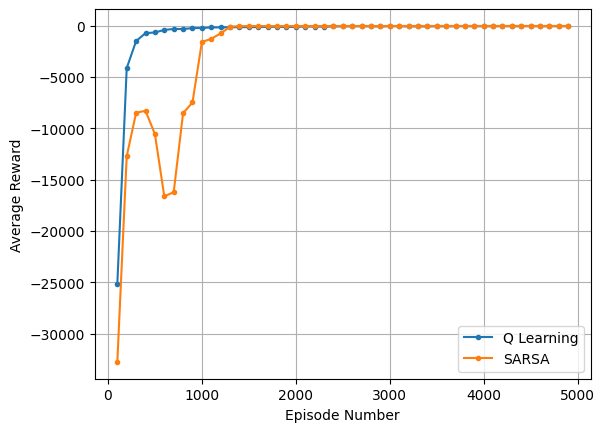

In [ ]:
plt.plot(episodeNumQlearn, avgRewardQlearn, marker='.', label="Q Learning")
plt.plot(episodeNumSARSA, avgRewardSARSA, marker='.', label="SARSA")
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
# plt.title('DT vs SVC - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Time Convergence



### $\color{blue}{\text{Q learning:}}$

In this particular reinforcement learning problem called "CliffWalking", we could still monitor the change in the Q-table across episodes to find convergence time, but since the environment is deterministic and has well-defined rewards, we could also base our convergence criterion on the total reward the agent receives.

Given the problem setup, we know that the optimal policy would take exactly 13 steps (12 steps to the right and 1 step up) to reach the goal, receiving a total reward of -13. So, we can consider our Q-Learning method to have converged when the total reward per episode is consistently -13. 

Let's modify the existing Q-Learning function to check for this:

In [ ]:
def Q_learning_convergence(env: gym.Env, step_size: float = 0.9, episodes: int = 5000, gamma: float = 0.95, decayRate: float = 0.001) -> np.ndarray:
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    epsilon = 1.0  # Initial epsilon value
    consecutive_optimal_episodes = 0  # Count of consecutive episodes with optimal reward
    avgSuccessEpisodes = []
    episodeNum = []

    for i in range(episodes):
        state, _ = env.reset()  # Reset environment for every new episode
        total_R = 0  # Reset total reward for the episode

        while True:  # Until the episode ends
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                action = np.argmax(Q[state])

            # Perform selected action on the environment and check next_state
            next_state, reward, done, truncated, _ = env.step(action)
            total_R += reward

            # Perform Q learning update:
            # Q(s,a) \leftarrow Q(s,a) +  step_size * [R + \gamma * \max_a Q(s',a) -  Q(s,a) ]
            Q[state][action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            # Assign new current state
            state = next_state

            # If episode has terminated, restart
            if done or truncated:
                break

        # Decay epsilon to increase probability of exploitation (OPTIONAL). E-greedy with constant epsilon is also fine.
        epsilon = decay_epsilon(i, decay_rate=decayRate)

        # Check for convergence based on total reward
        if total_R == -13:
            consecutive_optimal_episodes += 1
            # convergedEpisode.append(consecutive_optimal_episodes)
            

        if i%100==0 and not i==0:
            print("Trial",i,":")
            episodeNum.append(i)
            print(consecutive_optimal_episodes)
            print("Amount of converged episodes of the last 100 values", consecutive_optimal_episodes/100)
            avgSuccessEpisodes.append(consecutive_optimal_episodes/100)
            consecutive_optimal_episodes = 0
        # else:
        #     consecutive_optimal_episodes = 0

        # if consecutive_optimal_episodes > 100:  # If more than 100 consecutive episodes have optimal reward, consider it converged
        #     print(f'Converged at episode: {i - 100}')  # Subtract 100 to get the first episode in the optimal streak
        #     break

    return Q, avgSuccessEpisodes, episodeNum

def decay_epsilon(episode: int, max_epsilon: float = 1.0, min_epsilon: float = 0.1, decay_rate: float = 0.001) -> float:
    # Exponential decay of epsilon based on ep number
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    return epsilon


def determine_policy_from_Q(Q: np.ndarray) -> np.ndarray:
    # Build policy from Q function  by \pi(state) = \argmax_a Q(state,  a) for every state.
    policy = np.zeros(Q.shape[0])
    for s in range(Q.shape[0]):
        policy[s] = np.argmax(Q[s])
    return policy

In [ ]:
env = gym.make("CliffWalking-v0")
Q, avgSuccessEpisodesQlearn, episodeNum = Q_learning_convergence(env)  # Get Q value
opt_p = determine_policy_from_Q(Q)  # Get policy from  Q

successes = 0
n_runs = 2000
total_runs_reward = 0
for _ in range(n_runs):  # Test the policy n_runs times
    total_runs_reward+=test_policy(env, opt_p)  # Test the policy on your environment.

print(f"Test average reward: {total_runs_reward / n_runs}")
print(opt_p)

env.close()

Trial 100 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 200 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 300 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 400 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 500 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 600 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 700 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 800 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 900 :
2
Amount of converged episodes of the last 100 values 0.02
Trial 1000 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 1100 :
1
Amount of converged episodes of the last 100 values 0.01
Trial 1200 :
4
Amount of converged episodes of the last 100 values 0.04
Trial 1300 :
2
Amount of converged episodes of the last 100 values 0.02
Trial 1400 :
4
Amount of converged episodes of the last 100 values 0.04
Trial 1500

In this code, we track the total reward per episode and increase a counter (`consecutive_optimal_episodes`) every time the total reward is -13. If we get more than 100 consecutive episodes with an optimal total reward of -13, we consider the learning algorithm to have converged.

Note: The choice of 100 consecutive episodes is arbitrary, and you could choose a different threshold depending on your specific requirements. Similarly, the total reward threshold of -13 is based on the known optimal policy for this specific problem. This approach may not be applicable for other problems where the optimal policy is unknown.

### $\color{blue}{\text{SARSA:}}$

In [ ]:
def sarsa_convergence(env: gym.Env, step_size: float = 0.1, episodes: int = 5000, gamma: float = 0.95) -> np.ndarray:
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    epsilon = 1.0  # Initial epsilon value
    consecutive_optimal_episodes = 0  # Count of consecutive episodes with optimal reward
    avgSuccessEpisodes = []
    episodeNum = []

    for i in range(episodes):
        state, _ = env.reset()  # Reset environment for every new episode
        total_R = 0  # Reward count for each episode (OPTIONAL)

        while True:  # Until the episode ends
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                action = np.argmax(Q[state])

            # Perform selected action on the environment and check next_state
            next_state, reward, done, truncated, _ = env.step(action)
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                next_action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                next_action = np.argmax(Q[next_state])
            # Just keeps track of environment rewards (OPTIONAL)
            total_R += reward

            # Perform Q learning update:
            # Q(s,a) \leftarrow Q(s,a) +  step_size * [R + \gamma * \max_a Q(s',a) -  Q(s,a) ]
            Q[state][action] += step_size * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            # Assign new current state
            state = next_state

            # If episode has terminated, restart
            if done or truncated:
                break
        # Decay epsilon to increase probability of exploitation (OPTIONAL). E-greedy with constant epsilon is also fine.
        epsilon = decay_epsilon(i)

        # Check for convergence based on total reward
        if total_R == -17:
            consecutive_optimal_episodes += 1

        if i%100==0 and not i==0:
            print("Trial",i,":")
            episodeNum.append(i)
            print(consecutive_optimal_episodes)
            print("Amount of converged episodes of the last 100 values", consecutive_optimal_episodes/100)
            avgSuccessEpisodes.append(consecutive_optimal_episodes/100)
            consecutive_optimal_episodes = 0


    return Q, avgSuccessEpisodes, episodeNum

def decay_epsilon(episode: int, max_epsilon: float = 1.0, min_epsilon: float = 0.1, decay_rate: float = 0.001) -> float:
    # Exponential decay of epsilon based on ep number
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    return epsilon


def determine_policy_from_Q(Q: np.ndarray) -> np.ndarray:
    # Build policy from Q function  by \pi(state) = \argmax_a Q(state,  a) for every state.
    policy = np.zeros(Q.shape[0])
    for s in range(Q.shape[0]):
        policy[s] = np.argmax(Q[s])
    return policy

In [ ]:
env = gym.make("CliffWalking-v0")
Q, avgSuccessEpisodesSARSA, episodeNumSARSA = sarsa_convergence(env)  # Get Q value
opt_p = determine_policy_from_Q(Q)  # Get policy from  Q

successes = 0
n_runs = 2000
total_runs_reward = 0
for _ in range(n_runs):  # Test the policy n_runs times
    total_runs_reward+=test_policy(env, opt_p)  # Test the policy on your environment.

print(f"Test average reward: {total_runs_reward / n_runs}")
print(opt_p)

env.close()

Trial 100 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 200 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 300 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 400 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 500 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 600 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 700 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 800 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 900 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 1000 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 1100 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 1200 :
0
Amount of converged episodes of the last 100 values 0.0
Trial 1300 :
3
Amount of converged episodes of the last 100 values 0.03
Trial 1400 :
3
Amount of converged episodes of the last 100 values 0.03
Trial 1500 :


In [ ]:
len(episodeNumSARSA)

0

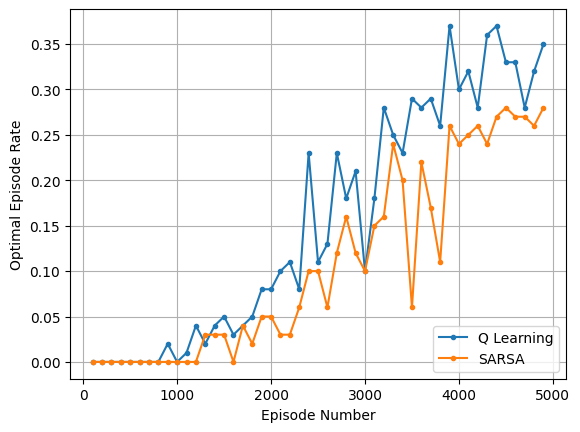

In [ ]:
plt.plot(episodeNumQlearn, avgSuccessEpisodesQlearn, marker='.', label="Q Learning")
plt.plot(episodeNumSARSA, avgSuccessEpisodesSARSA, marker='.', label="SARSA")
plt.xlabel('Episode Number')
plt.ylabel('Optimal Episode Rate')
# plt.title('DT vs SVC - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()